# Diplomado de Ciencia de Datos
## Módulo de Aprendizaje Automático
### Tema de Métodos Supervisados (Sesión 1)

In [1]:
# importar la biblioteca para análisis de datos
import numpy as np
# importar la biblioteca para graficación
import matplotlib.pyplot as plt
%matplotlib inline
# importar la biblioteca para manipulación y tratamiento de datos
import pandas as pd

In [2]:
# leer el conjunto de datos de ciudades de Canadá y Estados Unidos
cities_df = pd.read_csv("canada_usa_cities.csv")
cities_df.head()

,longitude,latitude,country
0,-130.0437,55.9773,USA
1,-134.4197,58.3019,USA
2,-123.0780,48.9854,USA
3,-122.7436,48.9881,USA
4,-122.2691,48.9951,USA


In [3]:
# obtener la información del dataset
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  209 non-null    float64
 1   latitude   209 non-null    float64
 2   country    209 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.0+ KB


In [4]:
# dividir el conjunto de datos en los conjuntos de entrenamiento(60%), validación (20%) y prueba (20%)
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=123)
train_df, validation_df = train_test_split(train_val_df, test_size=0.25, random_state=123)

print("conjunto de entrenamiento =", train_df.shape)
print("conjunto de validación =", validation_df.shape)
print("conjunto de prueba =", test_df.shape)

conjunto de entrenamiento = (125, 3)
conjunto de validación = (42, 3)
conjunto de prueba = (42, 3)


In [5]:
# Separar las variables independientes (características de las ciudades) 
# de la variable dependiente (país a la que pertenece)
X_train, y_train = train_df.drop(columns=["country"], axis=1), train_df["country"]
X_valid, y_valid = validation_df.drop(columns=["country"], axis=1), validation_df["country"]
X_test, y_test = test_df.drop(columns=["country"], axis=1), test_df["country"]
X_train.head()

,longitude,latitude
155,-80.3123,43.3601
109,-66.9195,44.8938
141,-79.6902,44.3893
115,-79.6457,43.5903
187,-67.9245,47.1652


## Clasificador de base (Zero Rule Algorithm)

In [6]:
# crea, entrena y evalua el modelo usando la estrategia Zero Rule
from sklearn.dummy import DummyClassifier

dc_model = DummyClassifier()
dc_model.fit(X_train, y_train)
dc_model.score(X_train, y_train)

0.6

In [7]:
# ¿Por qué obtiene esa exactitud?
canada_cities = (y_train == "Canada").sum()
eua_cities = (y_train == "USA").sum()
canada_cities/(canada_cities+eua_cities)

0.6

In [8]:
# Muestra el conjunto de prueba
test_df

,longitude,latitude,country
172,-64.8001,46.0980,Canada
175,-82.4066,42.9746,Canada
181,-111.3885,56.7292,Canada
132,-78.8630,43.9177,Canada
189,-112.8516,49.6943,Canada
195,-122.7454,53.9129,Canada
198,-72.5019,45.8864,Canada
170,-79.0906,43.8358,Canada
95,-79.0546,43.1642,Canada
31,-74.0060,40.7127,USA


In [9]:
# genera las predicciones para el conjunto de prueba
dc_model.predict(test_df)

array(['Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada'],
      dtype='<U6')

## Árboles de Decisión

In [10]:
# crea, entrena y evalua un árbol de decisión con una profundidad máxima de 3
from sklearn.tree import DecisionTreeClassifier

dtc3_model = DecisionTreeClassifier(max_depth=3)
dtc3_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",dtc3_model.score(X_train, y_train))
print("Exactitud de validación=",dtc3_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.864
Exactitud de validación= 0.8333333333333334


In [11]:
# crea, entrena y evalua un árbol de decisión con una profundidad máxima de 5
from sklearn.tree import DecisionTreeClassifier

dtc5_model = DecisionTreeClassifier(max_depth=5)
dtc5_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",dtc5_model.score(X_train, y_train))
print("Exactitud de validación=",dtc5_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.92
Exactitud de validación= 0.9047619047619048


In [12]:
# crea, entrena y evalua un árbol de decisión con una profundidad máxima de 7
from sklearn.tree import DecisionTreeClassifier

dtc7_model = DecisionTreeClassifier(max_depth=7)
dtc7_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",dtc7_model.score(X_train, y_train))
print("Exactitud de validación=",dtc7_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.976
Exactitud de validación= 0.8571428571428571


In [13]:
# selecciona y evalua el mejor árbol de decisión
dtc_model = dtc5_model
dtc_model.score(X_test, y_test)

0.8095238095238095

[Text(0.4444444444444444, 0.875, 'USA <= 43.093\ngini = 0.48\nsamples = 125\nvalue = [75, 50]'),
 Text(0.2222222222222222, 0.625, 'USA <= 42.096\ngini = 0.153\nsamples = 36\nvalue = [3, 33]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.3333333333333333, 0.375, 'USA <= 42.324\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.6666666666666666, 0.625, 'Canada <= -130.017\ngini = 0.309\nsamples = 89\nvalue = [72, 17]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.375, 'Canada <= -68.597\ngini = 0.285\nsamples = 87\nvalue = [72, 15]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.221\nsamples = 71\nvalue = [62, 9]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.469\nsamples = 16\nvalue = [10, 6]')]

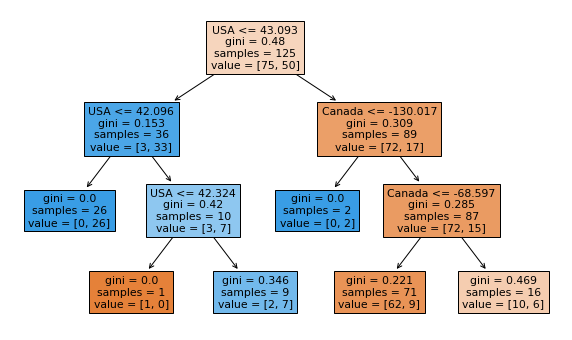

In [14]:
# grafica el árbol de decision con profundidad máxima de 3
from sklearn.tree import plot_tree

plot_tree(dtc3_model, feature_names=dtc3_model.classes_, filled=True, 
          ax=plt.subplots(figsize=(10, 6))[1])

## Bosques Aleatorios

In [15]:
# crea, entrena y evalua un bosque aleatorio con 5 árboles con profundidad 
# máxima de 3
from sklearn.ensemble import RandomForestClassifier

rfc5_3_model = RandomForestClassifier(n_estimators=5, max_depth=3)
rfc5_3_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",rfc5_3_model.score(X_train, y_train))
print("Exactitud de validación=",rfc5_3_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.84
Exactitud de validación= 0.8333333333333334


In [16]:
# crea, entrena y evalua un bosque aleatorio con 50 árboles con profundidad 
# máxima de 3
from sklearn.ensemble import RandomForestClassifier

rfc50_3_model = RandomForestClassifier(n_estimators=50, max_depth=3)
rfc50_3_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",rfc50_3_model.score(X_train, y_train))
print("Exactitud de validación=",rfc50_3_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.864
Exactitud de validación= 0.8333333333333334


In [17]:
# crea, entrena y evalua un bosque aleatorio con 50 árboles con profundidad 
# máxima de 5
from sklearn.ensemble import RandomForestClassifier

rfc50_5_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc50_5_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",rfc50_5_model.score(X_train, y_train))
print("Exactitud de validación=",rfc50_5_model.score(X_valid, y_valid))
print("Exactitud de prueba=",rfc50_5_model.score(X_test, y_test))

Exactitud de entrenamiento= 0.936
Exactitud de validación= 0.8809523809523809
Exactitud de prueba= 0.7619047619047619


In [18]:
# selecciona y evalua el mejor árbol de decisión
rfc_model = rfc50_5_model
rfc_model.score(X_test, y_test)

0.7619047619047619

## Regresión Logística

In [19]:
# crea, entrena y evalua un modelo de regresión logística
from sklearn.linear_model import LogisticRegression

lrc_model = LogisticRegression()
lrc_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",lrc_model.score(X_train, y_train))
print("Exactitud de validación=",lrc_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.832
Exactitud de validación= 0.8333333333333334


## Bayes Ingenuo Gaussiano

In [20]:
# crea, entrena y evalua un modelo de Bayes Ingenuo Gaussiano
from sklearn.naive_bayes import GaussianNB

gnbc_model = GaussianNB()
gnbc_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",gnbc_model.score(X_train, y_train))
print("Exactitud de validación=",gnbc_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.816
Exactitud de validación= 0.8571428571428571


## Máquina de Vectores de Soporte

In [21]:
# crea, entrena y evalua una máquina de vectores de soporte
from sklearn.svm import SVC

svmc_model = SVC()
svmc_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",svmc_model.score(X_train, y_train))
print("Exactitud de validación=",svmc_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.632
Exactitud de validación= 0.6190476190476191


### Matriz de confusión y métricas de evaluación

[[26  2]
 [ 6  8]]


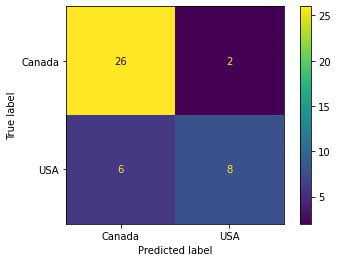

In [22]:
# obten la matriz de confusión del mejor árbol de decisión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = dtc_model.predict(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)

ConfusionMatrixDisplay.from_estimator(
    dtc_model, X_test, y_test,
    display_labels=["Canada", "USA"],
)

In [23]:
# calcula las métricas de evaluación del árbol de decisión
VN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
VP = cm[1,1]

Exactitud = (VP + VN) / (VP + VN + FP + FN)
Precision = VP / (VP + FP)
Recall = VP / (VP + FN) 
F1 = 2*VP / (2*VP + FP + FN )

print('Exactitud: ', Exactitud )
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1-score: ', F1)

Exactitud:  0.8095238095238095
Precision:  0.8
Recall:  0.5714285714285714
F1-score:  0.6666666666666666


In [24]:
# obten el reporte de clasificación del árbol de decisión
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        dtc_model.predict(X_test),
        target_names=["Canada", "USA"]
    )
)   

              precision    recall  f1-score   support

      Canada       0.81      0.93      0.87        28
         USA       0.80      0.57      0.67        14

    accuracy                           0.81        42
   macro avg       0.81      0.75      0.77        42
weighted avg       0.81      0.81      0.80        42



[[25  3]
 [ 7  7]]


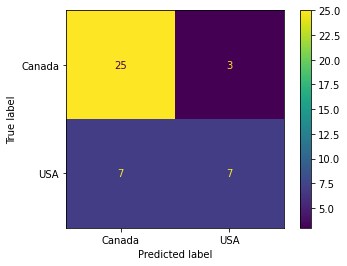

In [25]:
# obten la matriz de confusión del mejor bosque aleatorio
pred = rfc_model.predict(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)

ConfusionMatrixDisplay.from_estimator(
    rfc_model, X_test, y_test,
    display_labels=["Canada", "USA"],
)

In [26]:
# obten el reporte de clasificación del árbol de decisión
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        rfc_model.predict(X_test),
        target_names=["Canada", "USA"]
    )
)   

              precision    recall  f1-score   support

      Canada       0.78      0.89      0.83        28
         USA       0.70      0.50      0.58        14

    accuracy                           0.76        42
   macro avg       0.74      0.70      0.71        42
weighted avg       0.75      0.76      0.75        42



## Curvas ROC y Áreas bajo las curvas

<Figure size 432x288 with 0 Axes>

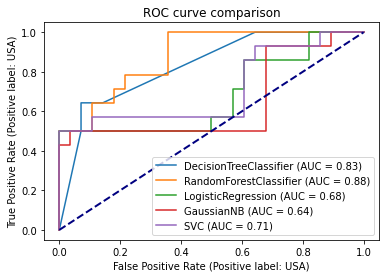

In [27]:
# calcular y mostrar las curvas ROC de cada modelo de aprendizaje
# y sus métricas de área bajo la curva (AUC)
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(dtc_model, X_test, y_test)
RocCurveDisplay.from_estimator(rfc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

##Conclusión: El modelo de **Bosques Aleatorios** fue el mejor con una exactitud de 0.88.